In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats

In [91]:
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


<h3>Data Cleaning</h3>
1. Null values: No null values<br>
2. Duplicate rows: No duplicate rows<br>
3. Outliers: No significant outliers (more than 3 SD away from mean)
<br>
Any scaling will be for analysis will be done within the file not adjusting the original dataset since we will be using mutiple models.

In [95]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

Here we are finding the optimal K value using the Elbow method, K=4

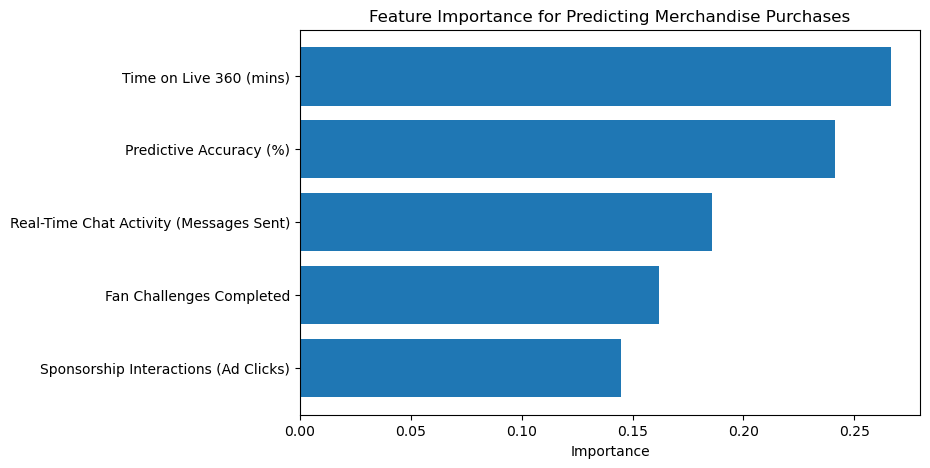

In [96]:
feature_importances = model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance')

plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Merchandise Purchases')
plt.show()

Top Predictors for Merchandise Purchases:<br>
1. Time on Live 360 (mins): Users who spend more time engaging in the live event are more likely to make purchases.
2. Predictive Accuracy (%): Higher predictive accuracy correlates with increased merchandise purchases, possibly indicating that more engaged or skilled users are willing to buy.
<br>
Now since we have this information we can assign weight to our KNN model which will increase it accuracy in predicting if a user is likely to purchase virtual merchandise.

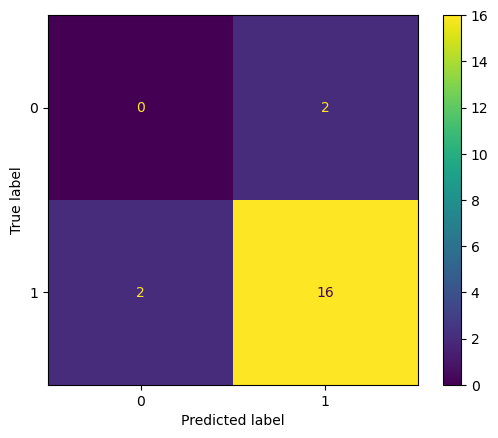

In [97]:
X_knn = df[['Time on Live 360 (mins)', 'Predictive Accuracy (%)', 
              'Real-Time Chat Activity (Messages Sent)', 'Fan Challenges Completed']]
y_knn = df['Virtual Merchandise Purchases'].apply(lambda x: 1 if x > 0 else 0)  

X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(knn_conf_matrix)
disp.plot()

Results:
1. Accuracy: 80%
2. Precision: 89%, Recall: 89%
<br>
We have now successfully made an effective model that will predict whether a given User is likely to purchase virtual merchandise

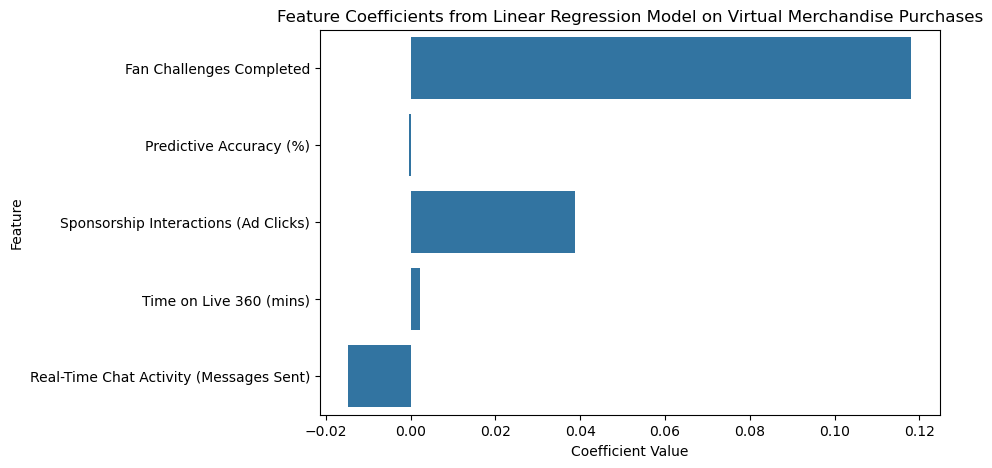

In [99]:
X_sklearn = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                  'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
                  'Real-Time Chat Activity (Messages Sent)']]
y_sklearn = df['Virtual Merchandise Purchases']

X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef_df = pd.DataFrame({
    'Feature': X_sklearn.columns,
    'Coefficient': lin_reg.coef_
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients from Linear Regression Model on Virtual Merchandise Purchases')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Here we are plotting the coefficient values calculated during linear regression model training. We can see that the Fans Challenges Completed as well as Sponsorship interactions correlate heavily with whether the user will purchase virtual merchandise, while real time chat activity has a negative correlation.

Since fan challenges and Ad clicks contribute significantly to the likely hood that someone will buy virtual merchandise, we will propose our new fan challenge to increase ad clicks. 
1. Multi-Event Challenge: Users participate in multiple events (e.g., 3-5 races) and complete progressively harder challenges. Each race unlocks new tiers of rewards and exclusive merchandise offers.
2. Key milestones in the challenge require users to click on sponsor ads. An
example of this: "Complete 2 challenges and click on 3 sponsor ads to unlock a 15% merchandise discount."
3. Leaderboard Competition: A real-time leaderboard ranks participants based on challenges completed, ad clicks, and time spent engaging.


Engagement Boost:
1. Race with progression, participants are encouraged to stay engaged over multiple events: 25-30% rise in fan challenges
2. Embedded sponsor ads interactions: 20-25% boost in sponsor ad clicks
3. Users rewarded with merchandise discounts and exclusive items, 15-20% increase in virtual merchandise